
### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing the Libraries Required

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Filtering warnings so as to give clean look to the notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [3]:

url = "http://bit.ly/w-data"
student = pd.read_csv(url)

student

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Getting the Data Statistics

In [4]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# Checking for the null values
student.isnull().sum()

Hours     0
Scores    0
dtype: int64

As we can see there is no NaN value present, we can proceed further

## Lets try to find a relationship visually between Hours studied and Scores obtained.

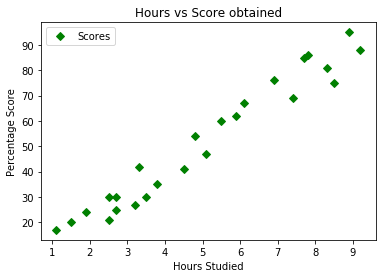

In [6]:

student.plot(x='Hours', y='Scores', style='D', color='G')
plt.title('Hours vs Score obtained')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

### Preparing data for Model

In [7]:
# Lets split our dataset in dependent and independ variables
x= student.iloc[:, :-1].values  
y = student.iloc[:, 1].values  

Now lets form a train and test dataset for model building using SK Learn

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
len(x_train)

20

In [11]:
len(x_test)

5

In [12]:
len(y_train)

20

In [13]:
len(y_test)

5

### Importing Linear Regression from sklearn

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
LinR= LinearRegression()

In [16]:
LinR.fit(x_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred =LinR.predict(x_test)

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,19.119345
1,85,84.814402
2,24,23.357736
3,86,85.873999
4,30,31.834518


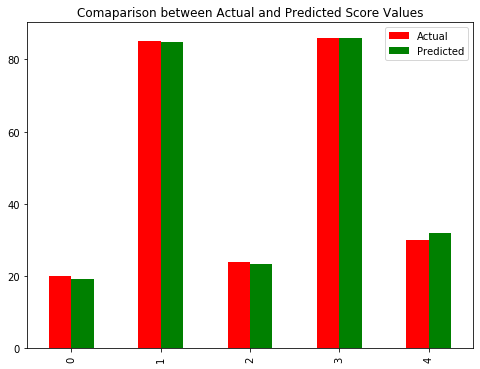

In [29]:
df.plot(kind='bar',figsize=(8,6), color=["R", "G"], title= "Comaparison between Actual and Predicted Score Values")

### Lets check the accuracy of our model

In [20]:
LinR.score(x_test, y_test)

0.9989751039478065

In [21]:
LinR.coef_

array([10.59597678])

In [22]:
LinR.intercept_

3.2253803042434015

### Plotting the regression line

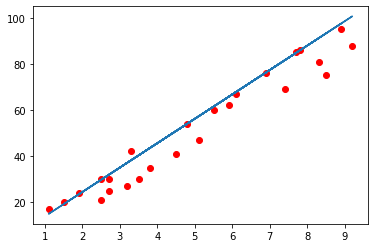

In [23]:
line = LinR.coef_*x+LinR.intercept_

# Plotting for the test data
plt.scatter(x, y, color='R')
plt.plot(x, line);
plt.show()

In [24]:
###Lets test our model by giving some additional hours which are not in dataset

In [31]:
##If you study for 4.25 hours....
A=LinR.predict([[4.25]])
print("Your_score_will_be:")
print(A)

Your_score_will_be:
[48.25828163]


In [32]:
##If you study for 7.57 hours....
A=LinR.predict([[7.57]])
print("Your_score_will_be:")
print(A)


Your_score_will_be:
[83.43692454]


### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 0.7338070456365073
